# Importing libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-prime-tv-shows/Prime TV Shows Data set.csv


In [2]:
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

In [3]:
prime_df = pd.read_csv('../input/amazon-prime-tv-shows/Prime TV Shows Data set.csv', encoding = 'iso-8859-1')

In [4]:
prime_df

,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
0,1,Pataal Lok,2020,1,Hindi,Drama,7.5,18+
1,2,Upload,2020,1,English,Sci-fi comedy,8.1,16+
2,3,The Marvelous Mrs. Maisel,2017,3,English,"Drama, Comedy",8.7,16+
3,4,Four More Shots Please,2019,2,Hindi,"Drama, Comedy",5.3,18+
4,5,Fleabag,2016,2,English,Comedy,8.7,18+
...,...,...,...,...,...,...,...,...
498,499,The Bellflower Bunnies,2002,1,English,Kids,NaN,All
499,500,Truck Games,2020,1,English,Kids,NaN,All
500,501,AnimaCars- Truck and Animal's Adventures,2019,1,English,Kids,NaN,All
501,502,Superzoo,2020,1,English,Kids,NaN,All


# Getting an overview of the dataset

In [5]:
prime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   S.no.                    503 non-null    int64  
 1   Name of the show         503 non-null    object 
 2   Year of release          503 non-null    int64  
 3   No of seasons available  503 non-null    int64  
 4   Language                 503 non-null    object 
 5   Genre                    503 non-null    object 
 6   IMDb rating              220 non-null    float64
 7   Age of viewers           503 non-null    object 
dtypes: float64(1), int64(3), object(4)
memory usage: 31.6+ KB


We can see there are 503 values for each column except for IMDb rating which shows missing values. Let's check out the percentage of missing values and get insights about why these values are missing.

In [6]:
# looking for null values
prime_df.isnull().sum()

S.no.                        0
Name of the show             0
Year of release              0
No of seasons available      0
Language                     0
Genre                        0
IMDb rating                283
Age of viewers               0
dtype: int64

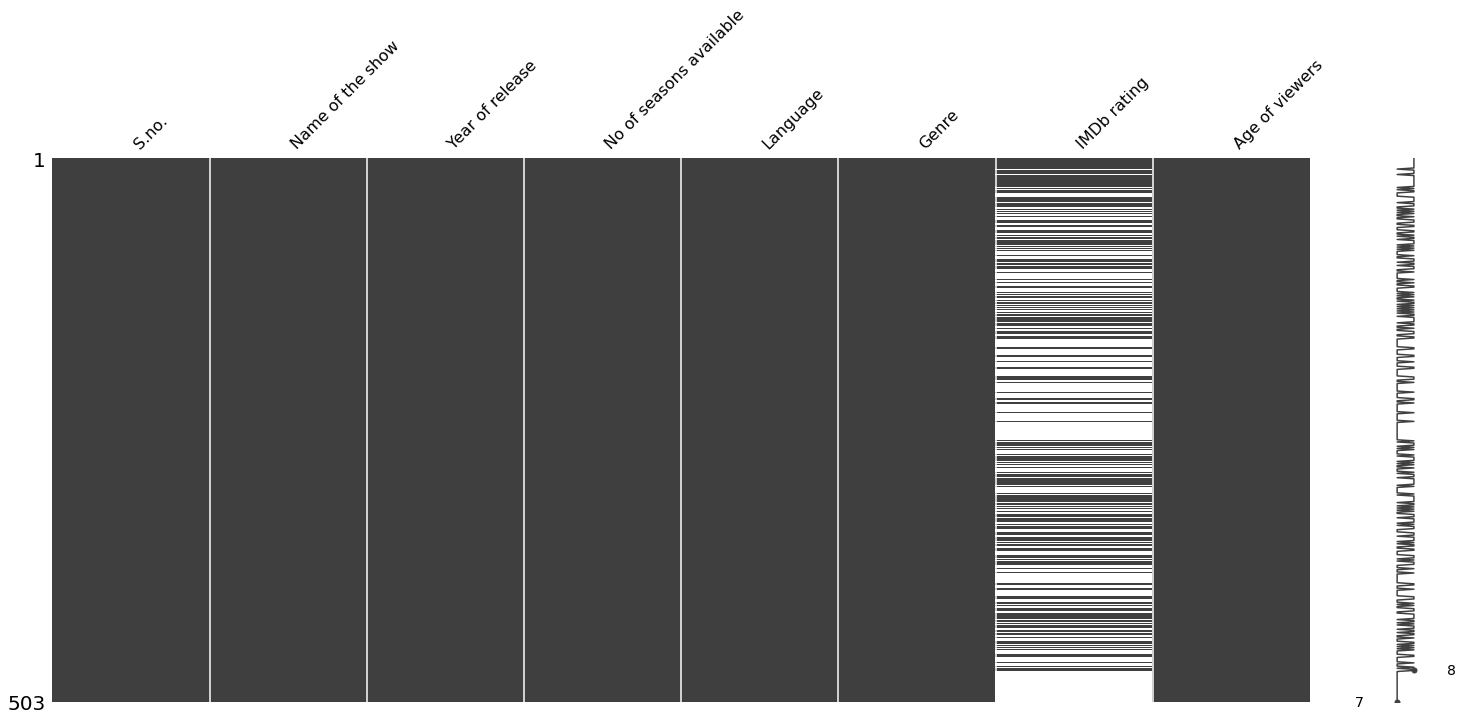

In [7]:
msno.matrix(prime_df);

In [8]:
# percentage of missing values in IMDb rating
(prime_df['IMDb rating'].isnull().sum()/prime_df.shape[0])*100

56.2624254473161

Nearly 56% of the values are missing because the users might not consider it necessary to leave a rating each time they watch a show. Maybe the one

In [9]:
prime_df['Language'].value_counts()

English       422
Hindi          39
Japanese       13
Italiano        8
Spanish         6
Deutsch         3
French          2
Nederlands      2
Serbian         2
Marathi         2
Telugu          1
Russian         1
Suomi           1
Hebrew          1
Name: Language, dtype: int64

Most number of missing values for IMDb rating are for english shows maybe because the maximum number of shows are in english

In [10]:
nadf = prime_df[prime_df['IMDb rating'].isnull()]

In [11]:
# the distribution of na's per language
nadf['Language'].value_counts()

English       230
Hindi          22
Italiano        8
Japanese        6
Spanish         5
French          2
Serbian         2
Nederlands      2
Marathi         2
Telugu          1
Deutsch         1
Russian         1
Hebrew          1
Name: Language, dtype: int64

In [12]:
# number of na's per language / number of values per language
nadf['Language'].value_counts() / prime_df['Language'].value_counts()

Deutsch       0.333333
English       0.545024
French        1.000000
Hebrew        1.000000
Hindi         0.564103
Italiano      1.000000
Japanese      0.461538
Marathi       1.000000
Nederlands    1.000000
Russian       1.000000
Serbian       1.000000
Spanish       0.833333
Suomi              NaN
Telugu        1.000000
Name: Language, dtype: float64

In [13]:
# looking at the data types
prime_df.dtypes

S.no.                        int64
Name of the show            object
Year of release              int64
No of seasons available      int64
Language                    object
Genre                       object
IMDb rating                float64
Age of viewers              object
dtype: object

In [14]:
# looking at the first 10 entries of the dataset
prime_df.head(10)

,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
0,1,Pataal Lok,2020,1,Hindi,Drama,7.5,18+
1,2,Upload,2020,1,English,Sci-fi comedy,8.1,16+
2,3,The Marvelous Mrs. Maisel,2017,3,English,"Drama, Comedy",8.7,16+
3,4,Four More Shots Please,2019,2,Hindi,"Drama, Comedy",5.3,18+
4,5,Fleabag,2016,2,English,Comedy,8.7,18+
5,6,Made in Heaven,2019,1,Hindi,Drama,8.3,18+
6,7,Homecoming,2018,2,English,Drama,7.5,16+
7,8,Mirzapur,2018,1,Hindi,Drama,8.5,18+
8,9,The Family Man,2019,1,Hindi,"Drama, Action",8.6,18+
9,10,Modern Love,2019,1,English,"Drama, Romance, Comedy",8.0,16+


# Data cleaning and simplification

* The S.no. column is not required so let's drop it

In [15]:
# drop S.no. column
prime_df.drop(['S.no.'],axis = 1, inplace = True)
prime_df

,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
0,Pataal Lok,2020,1,Hindi,Drama,7.5,18+
1,Upload,2020,1,English,Sci-fi comedy,8.1,16+
2,The Marvelous Mrs. Maisel,2017,3,English,"Drama, Comedy",8.7,16+
3,Four More Shots Please,2019,2,Hindi,"Drama, Comedy",5.3,18+
4,Fleabag,2016,2,English,Comedy,8.7,18+
...,...,...,...,...,...,...,...
498,The Bellflower Bunnies,2002,1,English,Kids,NaN,All
499,Truck Games,2020,1,English,Kids,NaN,All
500,AnimaCars- Truck and Animal's Adventures,2019,1,English,Kids,NaN,All
501,Superzoo,2020,1,English,Kids,NaN,All


# Data Analysis

In [16]:
sns.set_style('whitegrid')

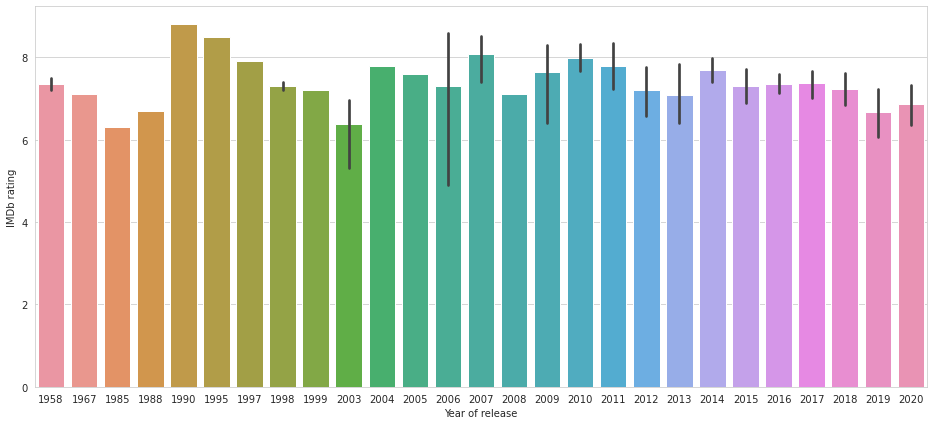

In [17]:
#plotting the ratings by year of release
plt.figure(figsize = (16,7))
sns.barplot(x = 'Year of release', y = 'IMDb rating', data = prime_df.dropna(axis = 0, subset = ['IMDb rating']));

The ratings for shows over the years vary slightly in their values and do not follow any particular trend

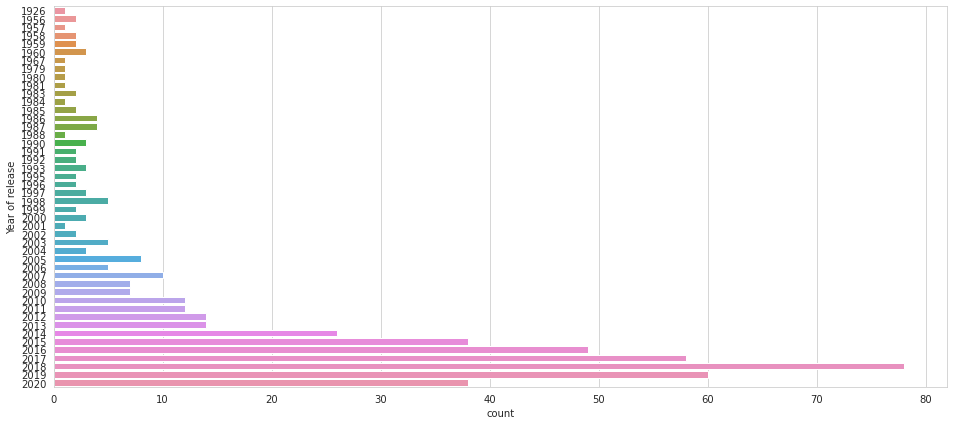

In [18]:
# plotting number of shows per year
plt.figure(figsize = (16,7))
sns.countplot(y = 'Year of release', data = prime_df);

The ratings have not changed much over the years while the number of shows offered on Amzon Prime have increased at a fast rate. The number of shows before the year 2010 are below 10. The number of shows have increased by 7.5 times by the year 2018 indicating that more shows have been released online. Although there seems to be a decrease after 2018. The data for 2020 cannot be considered for the analysis as it does not take all the months into account .

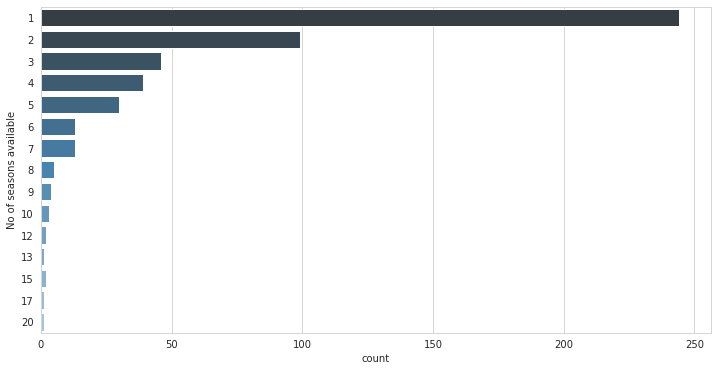

In [19]:
# plotting the shows by number of seasons
plt.figure(figsize = (12,6))
sns.countplot(y = 'No of seasons available', data = prime_df, palette="Blues_d");

Shows with less number of seasons, mostly 1 or 2 seasons are the highest.

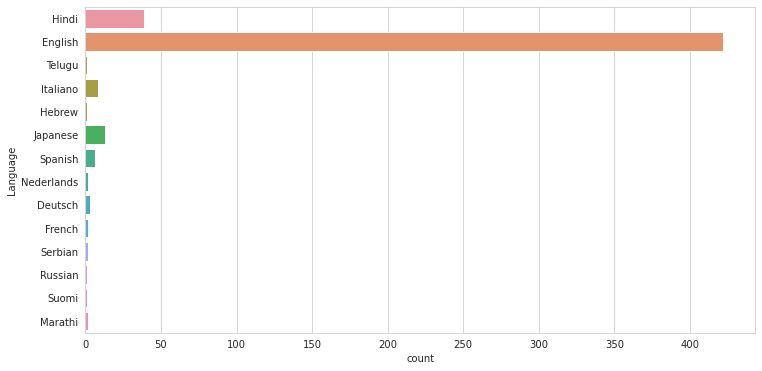

In [20]:
# plotting the shows by language
plt.figure(figsize = (12,6))
sns.countplot(y = 'Language', data = prime_df);

* The highest number of shows are in English followed by Hindi.
This might be because of the large taget audience as the most common language used by people is English and then Hindi to a considerable extent. Shows with language particular to a country or region are very less.

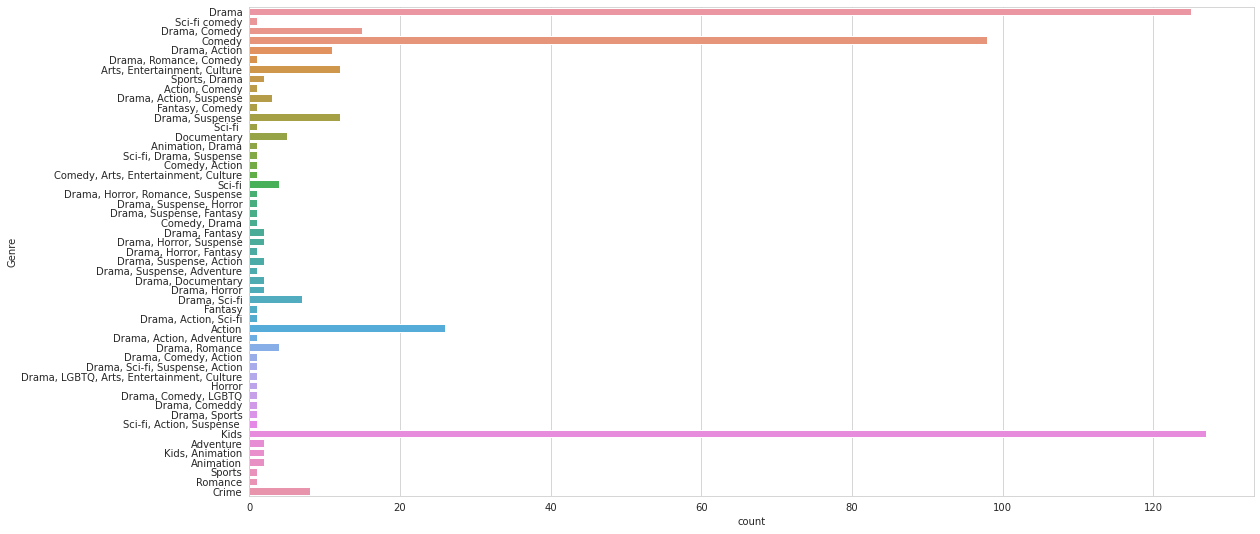

In [21]:
# plotting the shows by genres
plt.figure(figsize = (18,9))
sns.countplot(y = 'Genre', data = prime_df);

It is pretty evident that shows of genre Kids, Drama and Comedy are very high compared to others

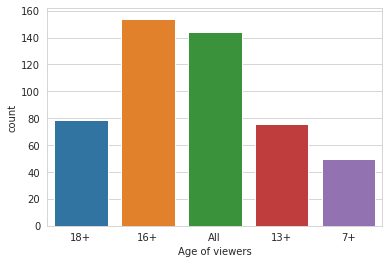

In [22]:
# plotting age of viewers
sns.countplot(x = 'Age of viewers', data = prime_df);

Most shows offered are for people above 16 years or for all age groups

## Highest rated shows on Amazon Prime

In [23]:
prime_df.sort_values(by = 'IMDb rating', ascending = False).head(10)

,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
20,The Test: A New Era for Australia's Team,2020,1,English,Documentary,9.0,16+
281,Seinfeld,1990,9,English,Comedy,8.8,13+
340,The Grand Tour,2017,4,English,Sports,8.7,16+
2,The Marvelous Mrs. Maisel,2017,3,English,"Drama, Comedy",8.7,16+
4,Fleabag,2016,2,English,Comedy,8.7,18+
37,Hostel Daze,2019,1,Hindi,"Drama, Comedy",8.7,16+
49,Downtown Abbey,2010,6,English,Drama,8.7,7+
51,This is Us,2017,3,English,Drama,8.7,16+
12,The Boys,2019,1,English,"Action, Comedy",8.7,18+
40,Dexter,2006,8,English,Drama,8.6,18+


In [24]:
(prime_df.sort_values(by = 'IMDb rating', ascending = False).head(30)).groupby(['Genre']).count()

,Name of the show,Year of release,No of seasons available,Language,IMDb rating,Age of viewers
Genre,,,,,,
"Action, Comedy",1,1,1,1,1,1
Comedy,3,3,3,3,3,3
"Comedy, Drama",1,1,1,1,1,1
Documentary,1,1,1,1,1,1
Drama,11,11,11,11,11,11
"Drama, Action",1,1,1,1,1,1
"Drama, Action, Suspense",1,1,1,1,1,1
"Drama, Comedy",2,2,2,2,2,2
"Drama, Suspense",3,3,3,3,3,3


## Lowest rated shows on Amazon Prime

In [25]:
prime_df.sort_values(by = 'IMDb rating').head(10)

,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
367,Ilana Glazer: The Planet is Burning,2020,1,English,Comedy,3.7,18+
162,Tokyo Alice,2019,1,Japanese,Drama,4.0,13+
243,Skulls and Roses,2019,1,Hindi,Action,4.3,18+
428,L.O.L Surprise,2019,1,English,Kids,4.3,All
413,Wishenpoof,2015,4,English,Kids,4.4,All
430,Alvin and the Chipmunks,2017,4,English,Kids,4.5,7+
375,Businessmen VS Aliens,2018,1,Japanese,Comedy,4.5,13+
317,Alice Wettlund: My Mama is a Human and So Am I,2019,1,English,Comedy,4.7,16+
466,Strawberry Shortcake,2003,1,English,Kids,4.8,All
473,G.I. Joe Sigma Six,2006,1,English,Kids,4.9,7+


In [26]:
(prime_df.sort_values(by = 'IMDb rating').head(30)).groupby(['Genre']).count()

,Name of the show,Year of release,No of seasons available,Language,IMDb rating,Age of viewers
Genre,,,,,,
Action,1,1,1,1,1,1
Comedy,10,10,10,10,10,10
"Comedy, Arts, Entertainment, Culture",1,1,1,1,1,1
Drama,4,4,4,4,4,4
"Drama, Action",1,1,1,1,1,1
"Drama, Comedy",1,1,1,1,1,1
Kids,12,12,12,12,12,12


* Among the highest rated shows, most of them belong to the genre Drama.
* A good percentage of the lowest rated shows are of genre Kids.

# Top 10 highest rated shows of 2020

In [27]:
prime_df[prime_df['Year of release'] == 2020].sort_values(by = 'IMDb rating', ascending = False).head(10)

,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
20,The Test: A New Era for Australia's Team,2020,1,English,Documentary,9.0,16+
452,Jessy and Nessy,2020,1,English,Kids,8.3,All
1,Upload,2020,1,English,Sci-fi comedy,8.1,16+
17,The Forgotten Army- Azaadi ke Liye,2020,1,Hindi,"Drama, Action",8.0,18+
73,Star Trek: Picard,2020,1,English,Sci-fi,7.6,18+
0,Pataal Lok,2020,1,Hindi,Drama,7.5,18+
19,Tales from the Loop,2020,1,English,Sci-fi,7.5,18+
406,Just Add Magic: Mystery City,2020,1,English,Kids,7.3,All
14,Hunters,2020,1,English,"Drama, Action, Suspense",7.2,18+
286,Jimmy O. Yang: Good Deal,2020,1,English,"Arts, Entertainment, Culture",7.1,18+


# Top 5 highest rated English shows and Hindi shows

In [28]:
prime_df[prime_df['Language'] == 'English'].sort_values(by = 'IMDb rating', ascending = False).head(5)

,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
20,The Test: A New Era for Australia's Team,2020,1,English,Documentary,9.0,16+
281,Seinfeld,1990,9,English,Comedy,8.8,13+
49,Downtown Abbey,2010,6,English,Drama,8.7,7+
4,Fleabag,2016,2,English,Comedy,8.7,18+
340,The Grand Tour,2017,4,English,Sports,8.7,16+


In [29]:
prime_df[prime_df['Language'] == 'Hindi'].sort_values(by = 'IMDb rating', ascending = False).head(5)

,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
37,Hostel Daze,2019,1,Hindi,"Drama, Comedy",8.7,16+
8,The Family Man,2019,1,Hindi,"Drama, Action",8.6,18+
7,Mirzapur,2018,1,Hindi,Drama,8.5,18+
16,Breathe,2018,1,Hindi,"Drama, Suspense",8.4,16+
5,Made in Heaven,2019,1,Hindi,Drama,8.3,18+


# Show with maximum number of seasons

In [30]:
prime_df[prime_df['No of seasons available'] == prime_df['No of seasons available'].max()]

,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
229,Forensic Files,1998,20,English,Documentary,NaN,13+


# Highest rated shows with 5 seasons or more
If you want to watch a long series with more than 5 seasons then probably you would have to choose from the following shows..

In [31]:
prime_df[prime_df['No of seasons available'] >= 5].sort_values(by = 'IMDb rating', ascending = False).head(10)

,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
281,Seinfeld,1990,9,English,Comedy,8.8,13+
49,Downtown Abbey,2010,6,English,Drama,8.7,7+
40,Dexter,2006,8,English,Drama,8.6,18+
436,Tumble Leaf,2014,6,English,Kids,8.6,All
47,Shameless,2011,10,English,"Comedy, Drama",8.6,18+
105,Mad Men,2007,7,English,Drama,8.6,16+
28,Suits,2011,8,English,Drama,8.5,16+
39,Supernatural,2006,15,English,"Drama, Suspense, Horror",8.4,16+
67,Fringe,2009,5,English,Sci-fi,8.4,16+
68,Person of Interest,2012,5,English,"Drama, Action, Suspense",8.4,16+


# The oldest show available on Amazon Prime

In [32]:
prime_df[prime_df['Year of release'] == prime_df['Year of release'].min()]

,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
201,The Cecil B. DeMille Classics Collection,1926,1,English,Drama,NaN,13+
